# 孤立森林(Isolation Forest)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
from random import sample
from numpy import random
import matplotlib.pyplot as plt

# Data

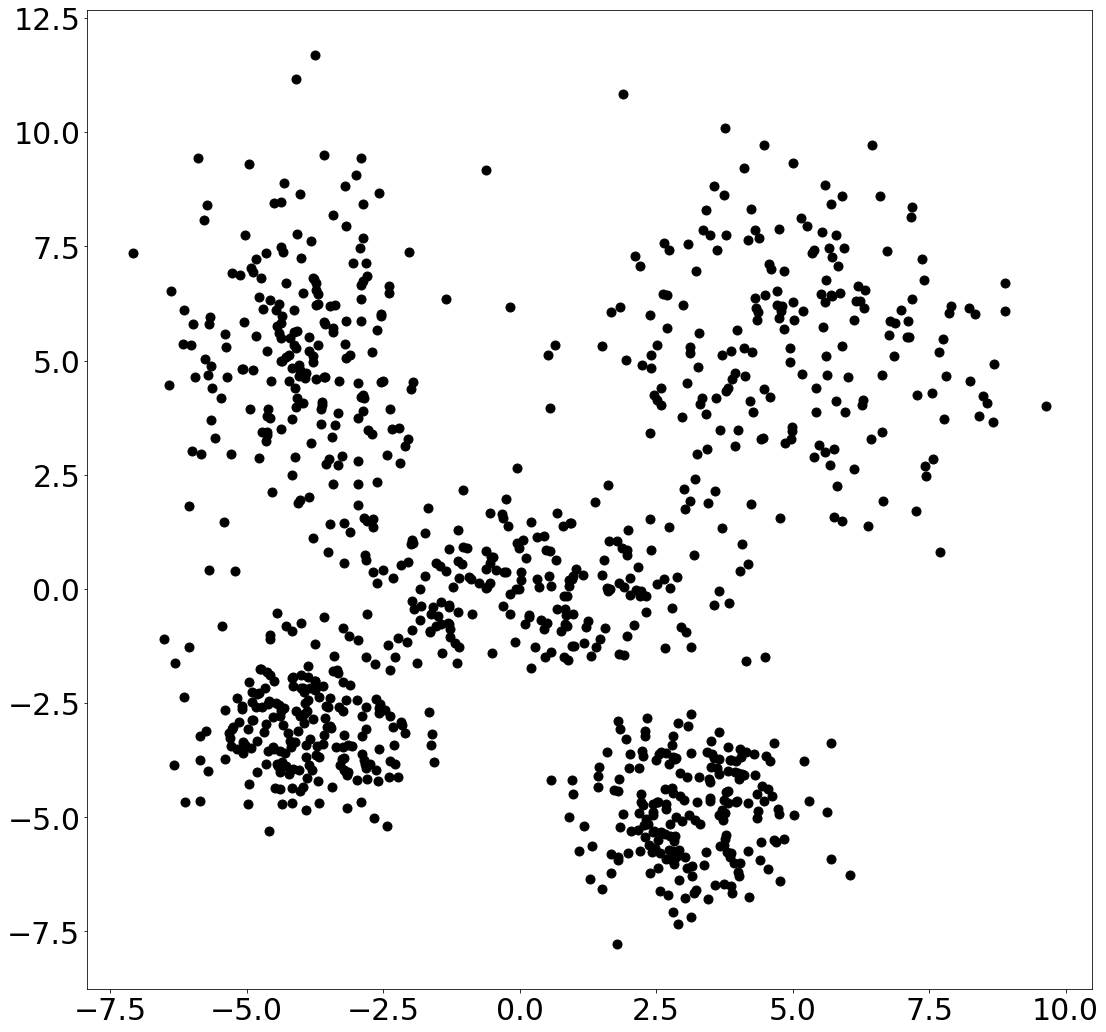

In [2]:
N=1000
X=np.zeros((N,2))
plt.rcParams["figure.figsize"] = (18,18)
x_loc=[-4,0,3,5,-4]
y_loc=[5,0,-5,5,-3]
x_scale=[1,2,1,2,1]
y_scale=[2,1,1,2,1]
for i in range(5):
    X[i*200:(i+1)*200,0]=random.normal(loc=x_loc[i], scale=x_scale[i], size=200)
    X[i*200:(i+1)*200,1]=random.normal(loc=y_loc[i], scale=y_scale[i], size=200)
plt.plot(X[:,0],X[:,1],"ko",markersize=9)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Isolation Tree

In [3]:
def Isolation_Tree(X,X_real,index,depth,lim,depth_array):
    if(depth==lim):
        return depth_array
    M=X.shape[1]
    q=random.randint(0,M)
    p=random.uniform(np.min(X[:,q]),np.max(X[:,q]))
    BOOL=(X[:,q]<p)
    left_index,right_index=index[BOOL],index[~BOOL]
    #print(depth,left_index,right_index)
    if(len(left_index)==1 and len(right_index)==1):
        depth_array[left_index]=depth
        depth_array[right_index]=depth
        return depth_array
    elif(len(left_index)==1):
        depth_array[left_index]=depth
        depth_array=Isolation_Tree(X[~BOOL],X_real,right_index,depth+1,lim,depth_array)
        return depth_array
    elif(len(right_index)==1):
        depth_array[right_index]=depth
        depth_array=Isolation_Tree(X[BOOL],X_real,left_index,depth+1,lim,depth_array)
        return depth_array
    else:
        depth_array=Isolation_Tree(X[BOOL],X_real,left_index,depth+1,lim,depth_array)
        depth_array=Isolation_Tree(X[~BOOL],X_real,right_index,depth+1,lim,depth_array)
        return depth_array

# Isolation Forest

In [4]:
N=X.shape[0]
sample_size=900
max_iter=30
threshold=3
lim=50
depth_array=np.ones((max_iter,N))*lim
for i in range(max_iter):
    real_index=np.array(sample(range(0,N), k=sample_size))
    depth_array[i]=Isolation_Tree(X[real_index],X,real_index,0,lim,depth_array[i])
outlier=np.array(np.where(np.sum(depth_array<threshold,axis=0)!=0)).flatten()
print(outlier)

[ 37  41 106 125 172 417 437 439 451 524 542 558 643 659 717 750 757 768
 784 798 937]


# Plot 

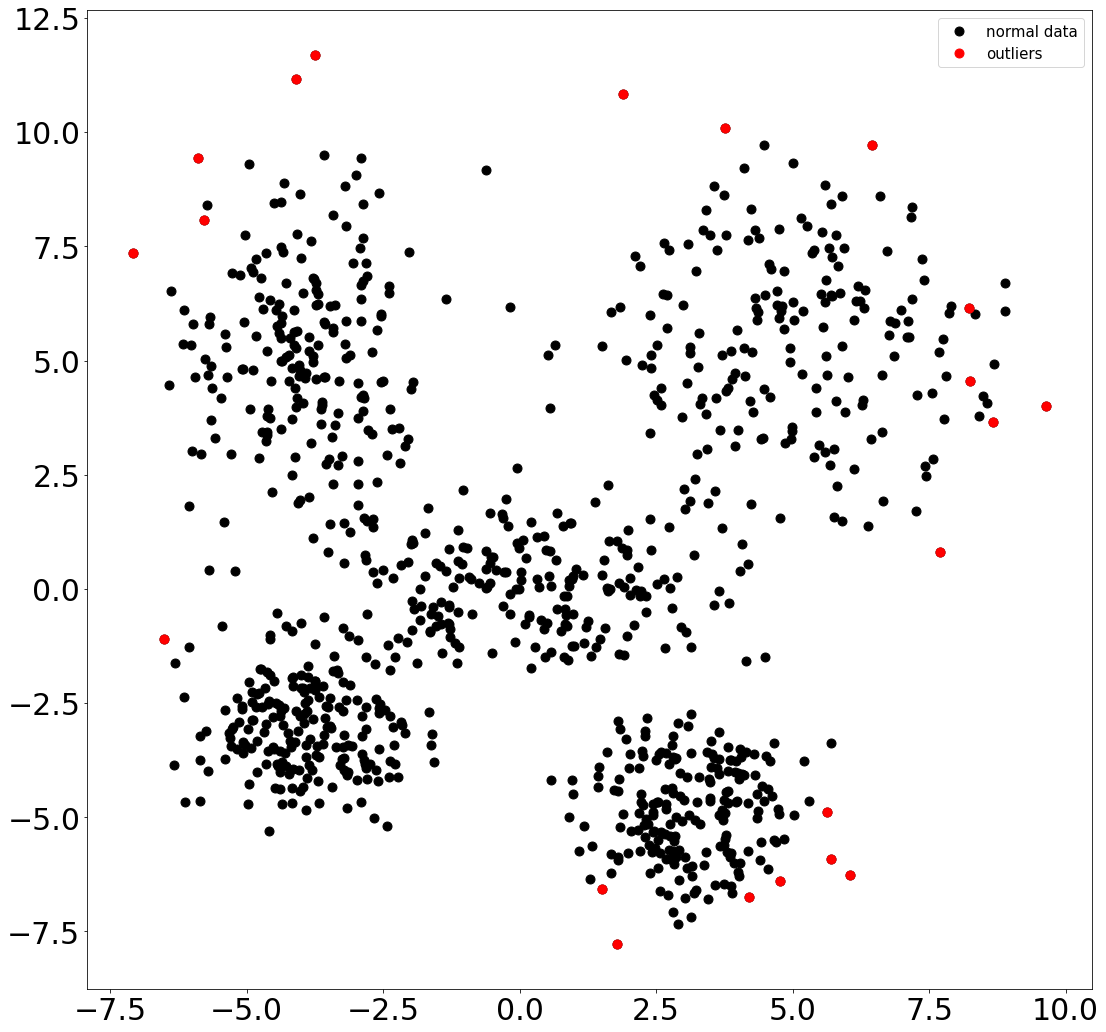

In [5]:
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(X[:,0],X[:,1],"ko",markersize=9,label="normal data")
plt.plot(X[outlier,0],X[outlier,1],"ro",markersize=9,label="outliers")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=15)
plt.show()